<a href="https://colab.research.google.com/github/kmt112/themarketanalyst/blob/master/Handwriting_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm,skew
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, log_loss
import itertools

In [21]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
text_mnist = tf.keras.datasets.mnist.load_data(path="mnist.npz")  # load dataset

(train_images, train_labels), (test_images, test_labels) = text_mnist  # split into tetsing and training

In [13]:
train_images[0,23,23]  # let's have a look at one pixel

0

In [14]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

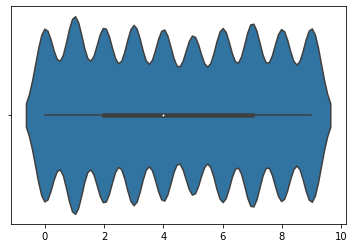

In [30]:
sns.violinplot(train_labels)

We can see that the number of lables are equally distributed across 0 to 9

In [0]:
Number_names = ['1', '2', '3', '4', '5',
               '6', '7', '8', '9', '10']

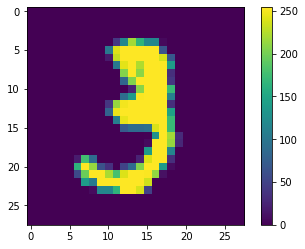

In [35]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.0 #normalizing (divide by 255 as pixels range from 0-255)

test_images = test_images / 255.0 #normalizing (divide by 255 as pixels range from 0-255)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will conist of 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(train_images, train_labels, epochs=10)  # we pass the data, labels and epochs and watch the magic!

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2549 - accuracy: 0.9269
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1124 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0761 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0561 - accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0195 - accuracy: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.016

Clearly, we are over fitting, at 10 epochs we have an overall accuracy of 0.9949.

In [41]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0910 - accuracy: 0.9752
Test accuracy: 0.9751999974250793


In [0]:
test_predictions = model.predict(test_images)


In [0]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=12)
    plt.xlabel('Predicted label', size=12)

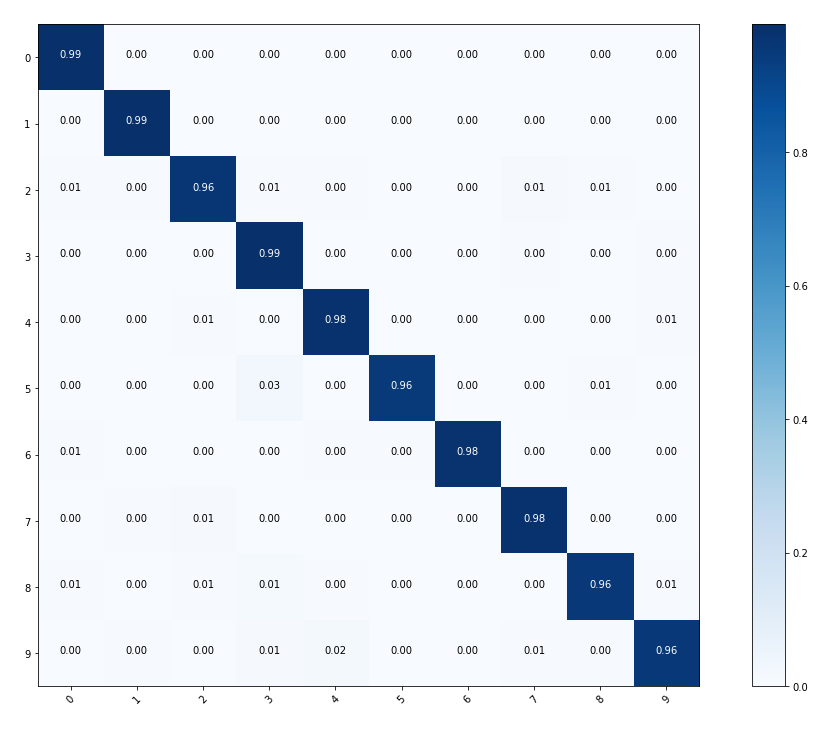

In [89]:
from sklearn.metrics import confusion_matrix, log_loss
conf_mat_val = confusion_matrix(test_labels, np.argmax(test_predictions,axis=1))
plot_confusion_matrix(conf_mat_val,["0","1","2","3","4","5","6","7","8","9"], title='Confusion Matrix on Validation data', normalize=True)

Pick a number: 6


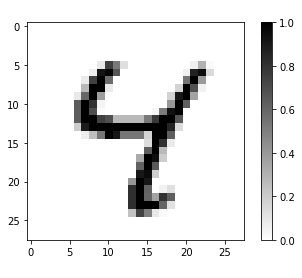

In [94]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):

  prediction = model.predict(np.array([image]))
  predicted_class = Number_names[np.argmax(prediction)]

  show_image(image, Number_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)